In [6]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"
import scipy.stats as st

In [2]:
np.random.seed(20230827)

In [3]:
deltas = [0.05,0.1]

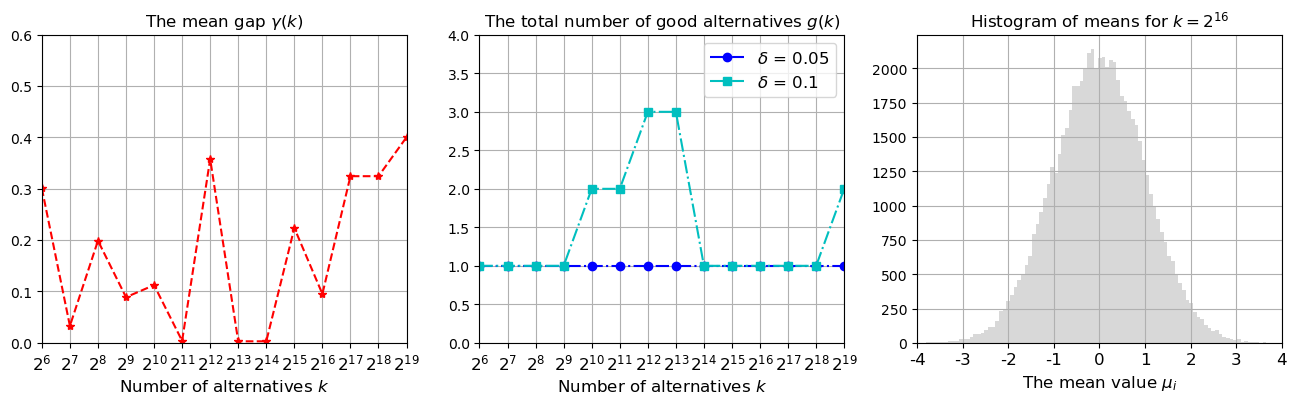

In [4]:
fontsize=14
_colors = ["r" ,"c", "k", "b", "r"]
_markers = ["o", "s", "d", "o"]
_line_styles = ["--", "-.", ":","--", "-.", "--", '-.']

fig = plt.figure(figsize=(16, 4))

fig_plots = [(1,3,1), (1,3, 2), (1, 3, 3)]

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    min_power = 6
    max_power = 19
    n = 1
    powers = np.arange(min_power, max_power+1)
    if i == 2:  
        plt.hist(np.random.normal(0,1, 2**16), color="grey", bins=100, alpha=0.3)
        plt.grid(0.3)
        plt.xlim(-4, 4)
        ax.set_xlabel("The mean value $\mu_i$", size=fontsize-2)
        plt.title("Histogram of means for $k=2^{16}$")
        xticks = np.arange(-4, 5)
        plt.xticks(xticks, xticks, fontsize=fontsize-2)

        
    if i == 1:
        n_goods = []
        mean_gaps = []
        lbs_list = []
        ubs_list = []
        k = 2**max_power
        _data = np.random.normal(0, 1, (k, n))
        for k in np.power(2, np.arange(min_power, max_power+1)):
            data = _data[:k]
            _n_goods = []
            means = []
            lbs = []
            ubs = []
            for delta in deltas:
                thresholds = np.max(data, axis=0) - delta
                compare = data >= thresholds
                _n_goods.append(np.mean(np.sum(compare, axis=0)))
            n_goods.append(_n_goods)
        n_goods = np.array(n_goods).T

        
        colors = ["b", "c"]
        for i, _list in enumerate(n_goods):
            plt.plot(np.arange(min_power, max_power+1), _list, "-.{}".format(colors[i]), marker=_markers[i], label="$\delta$ = {}".format(deltas[i]))
        plt.legend(prop={"size":fontsize-2})
        plt.xlim(min_power, max_power)
        xticks = powers
        xticklabels = ["2^{"+str(power)+"}" for power in xticks]
        xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
        plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
        ax.set_xlabel("Number of alternatives $k$", size=fontsize-2)
        plt.title("The total number of good alternatives $g(k)$")
        plt.ylim(0, 4)
        plt.grid(0.3)

    if i == 0:
        means = []
        lbs = []
        ubs = []
        k = 2**max_power
        _data = np.random.normal(0, 1, (k, n))
        for k in np.power(2, np.arange(min_power, max_power+1)):
            data = _data[:k]
            top_2 = np.argpartition(data, -2, axis=0)[-2:]
            top_2 = [data[top_2[:, i]][:, i] for i in range(data.shape[1])]
            mean_gaps = np.max(top_2, axis=1) - np.min(top_2, axis=1)
            
            means.append(np.mean(mean_gaps))
        plt.plot(np.arange(min_power, max_power+1), means, "--*", color="r",label="Average $\gamma(k)$")
        plt.ylim(0, 0.6)
        plt.grid(0.3)
        
        plt.xlim(min_power, max_power)
        xticks = powers
        xticklabels = ["2^{"+str(power)+"}" for power in xticks]
        xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
        plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
        ax.set_xlabel("Number of alternatives $k$", size=fontsize-2)
        plt.title("The mean gap $\gamma(k)$")
    


plt.show()

fig.savefig("Figure_EC10.pdf", bbox_inches='tight')

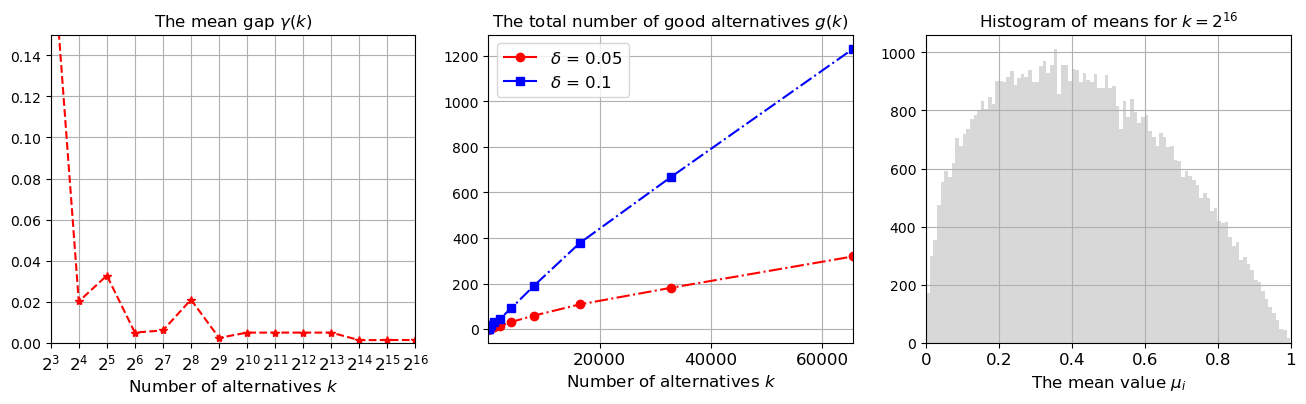

In [5]:
fontsize=14
powers = np.arange(min_power, max_power+1)
colors = ["r" , "b",  "m","c", "k", "b", "r"]
_markers = ["o", "s", "d", "o"]
_line_styles = ["--", "-.", ":","--", "-.", "--", '-.']

fig = plt.figure(figsize=(16, 4))

fig_plots = [(1,3,1), (1,3, 2), (1, 3, 3)]

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    min_power = 3
    max_power = 16
    n = 1
    powers = np.arange(min_power, max_power+1)
    if i == 2:  
        plt.hist(np.random.beta(1.5, 2, 2**16), color="grey", bins=100, alpha=0.3)
        plt.grid(0.3)
        plt.xlim(0, 1)
        ax.set_xlabel("The mean value $\mu_i$", size=fontsize-2)
        plt.title("Histogram of means for $k=2^{16}$")
        xticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
        plt.xticks(xticks, xticks, fontsize=fontsize-2)
        
    if i == 1:
        n_goods = []
        mean_gaps = []
        lbs_list = []
        ubs_list = []
        k = 2**max_power
        _data = np.random.beta(1.5, 2, (k,n))
        for k in np.power(2, np.arange(min_power, max_power+1)):
            data = _data[:k]
            _n_goods = []
            means = []
            lbs = []
            ubs = []
            for delta in deltas:
                thresholds = np.max(data, axis=0) - delta
                compare = data >= thresholds
                _n_goods.append(np.mean(np.sum(compare, axis=0)))
            n_goods.append(_n_goods)
        n_goods = np.array(n_goods).T


        for i, _list in enumerate(n_goods):
            plt.plot(np.power(2, np.arange(min_power, max_power+1)), _list, "-.{}".format(colors[i]), marker=_markers[i], label="$\delta$ = {}".format(deltas[i]))
        plt.legend(prop={"size":fontsize-2})
        plt.xlim(2**min_power, 2**max_power)
        xticks = [20000, 40000, 60000]
        plt.xticks(xticks, xticks, fontsize=fontsize-2)
        ax.set_xlabel("Number of alternatives $k$", size=fontsize-2)
        plt.title("The total number of good alternatives $g(k)$")
        plt.grid(0.3)

    if i == 0:
        means = []
        lbs = []
        ubs = []
        k = 2**max_power
        _data = np.random.beta(1.5, 2, (k,n))
        for k in np.power(2, np.arange(min_power, max_power+1)):
            data = _data[:k]
            top_2 = np.argpartition(data, -2, axis=0)[-2:]
            top_2 = [data[top_2[:, i]][:, i] for i in range(data.shape[1])]
            mean_gaps = np.max(top_2, axis=1) - np.min(top_2, axis=1)
            means.append(np.mean(mean_gaps))

        plt.plot(np.arange(min_power, max_power+1), means, "--*", color="r", label="Average $\gamma(k)$")
        plt.ylim(0, 0.15)
        plt.grid(0.3)
        
        plt.xlim(min_power, max_power)
        xticks = powers
        xticklabels = ["2^{"+str(power)+"}" for power in xticks]
        xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
        plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
        ax.set_xlabel("Number of alternatives $k$", size=fontsize-2)
        plt.title("The mean gap $\gamma(k)$")
    


plt.show()

fig.savefig("Figure_EC11.pdf", bbox_inches='tight')
